<a href="https://colab.research.google.com/github/Emmaalvare/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define materias de nivel secundario
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Física', 'Química', 'Biología', 'Arte', 'Música']

# Crear lista de apellidos y nombres (puedes agregar más)
apellidos = ['Gómez', 'Pérez', 'Rodríguez', 'López', 'Martínez', 'García', 'Sánchez', 'González', 'Fernández', 'Torres']
nombres = ['Juan', 'Ana', 'Pedro', 'María', 'Luis', 'Sofía', 'Carlos', 'Laura', 'Diego', 'Valentina']

# Generar datos aleatorios para 100 filas
data = []
for _ in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)  # Máximo 20 faltas
  data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Mostrar el DataFrame
df

,Apellido,Nombre,DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Gómez,Valentina,31106252,Arte,6,5,3,3
1,Sánchez,Valentina,96428126,Física,7,5,9,3
2,García,Juan,47863116,Inglés,5,5,3,9
3,López,Diego,94649183,Educación Física,5,7,10,7
4,Gómez,Valentina,68584204,Lengua y Literatura,10,5,8,5
...,...,...,...,...,...,...,...,...
95,Rodríguez,Laura,67830363,Educación Física,5,5,9,9
96,Sánchez,Carlos,92398134,Lengua y Literatura,1,7,8,17
97,Rodríguez,Juan,35971748,Lengua y Literatura,5,2,7,5
98,Sánchez,Diego,43842722,Química,9,10,8,4


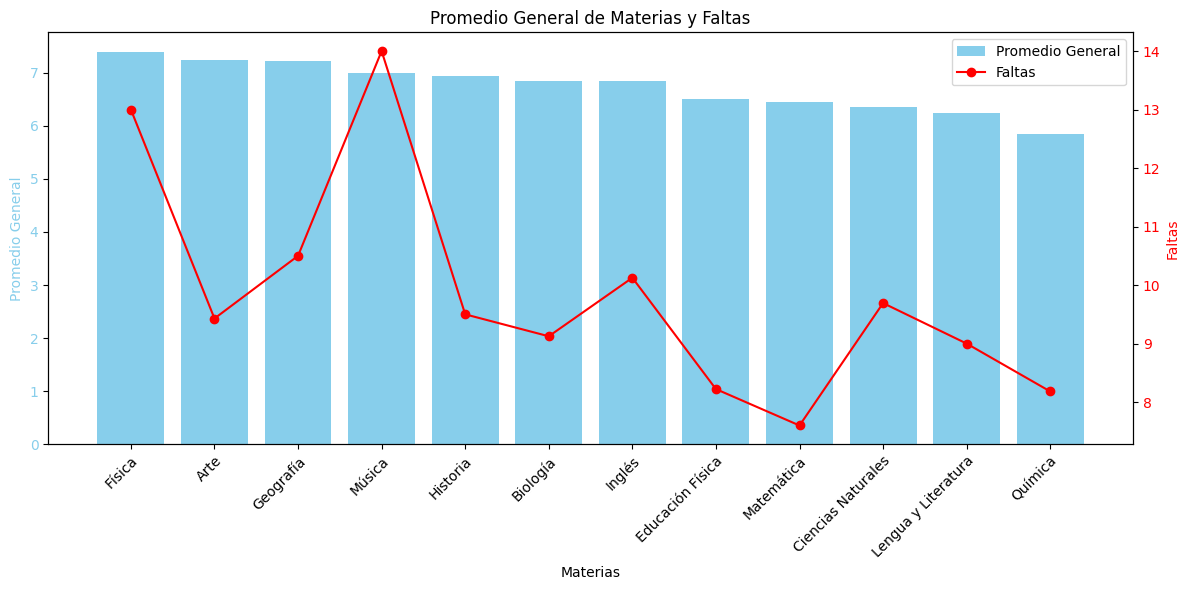

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean', 'Faltas a clases': 'mean'})
promedios_materias['Promedio General'] = promedios_materias.mean(axis=1)

# Ordenar las materias por promedio general de mayor a menor
promedios_materias = promedios_materias.sort_values('Promedio General', ascending=False)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para el promedio general
ax1.bar(promedios_materias.index, promedios_materias['Promedio General'], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materias')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas')

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(promedios_materias.index, promedios_materias['Faltas a clases'], color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar etiquetas del eje x para mejor legibilidad
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mostrar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)